In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/refined/imoveis.csv')

In [4]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,url,header,address,amenities,crawler,crawled_at,...,Lavanderia,Pé direito alto,Closet,Armário na cozinha,Varanda fechada com vidro,Quadra de squash,Dependência de empregados,Arvorismo,Perto de transporte público,Portão eletrônico
0,0,0,0,2643943408,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com Quarto à Venda, 37m²","Rua Doutor Plínio Barreto, 142 - Bela Vista, S...","Condomínio fechado, Aceita animais, Jardim, Sa...",bela_vista,2023-07-15 15:47:00,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,2644125282,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com Quarto à Venda, 45m²","Rua Major Diogo, 750 - Bela Vista, São Paulo - SP","Piscina, Churrasqueira, Academia, Aceita anima...",bela_vista,2023-07-15 15:47:00,...,0,0,0,0,0,0,0,0,0,0
2,2,2,3,2644083580,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com Quarto à Venda, 43m²","Rua Monsenhor Passaláqua - Bela Vista, São Pau...",Salão de festas,bela_vista,2023-07-15 15:47:00,...,0,0,0,0,0,0,0,0,0,0
3,3,3,4,2643813758,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com Quarto à Venda, 45m²","Rua Humaitá - Bela Vista, São Paulo - SP","Elevador, Área de serviço, Perto de vias de ac...",bela_vista,2023-07-15 15:47:00,...,0,0,0,0,0,0,0,0,0,0
4,4,4,5,2643942600,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com Quarto à Venda, 38m²","Rua Doutor Plínio Barreto, 142 - Bela Vista, S...","Condomínio fechado, Aceita animais, Jardim, Sa...",bela_vista,2023-07-15 15:47:00,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6323 entries, 0 to 6322
Data columns (total 95 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.2                  6323 non-null   int64  
 1   Unnamed: 0.1                  6323 non-null   int64  
 2   Unnamed: 0                    6323 non-null   int64  
 3   id                            6323 non-null   int64  
 4   url                           6323 non-null   object 
 5   header                        6323 non-null   object 
 6   address                       6323 non-null   object 
 7   amenities                     5507 non-null   object 
 8   crawler                       6323 non-null   object 
 9   crawled_at                    6323 non-null   object 
 10  Quarto                        6323 non-null   int64  
 11  Banheiro                      6323 non-null   int64  
 12  Garagem                       6323 non-null   int64  
 13  con

In [6]:
df.shape

(6323, 95)

In [26]:
df.agg({'preço': ["mean","median","std"]})

,preço
mean,1.055994e+06
median,7.990000e+05
std,8.279022e+05


In [28]:
df.agg({'condominio': ["mean","median","std"]})

,condominio
mean,1836.293419
median,836.000000
std,27349.628343


In [7]:
df.groupby('crawler').agg({'preço': ["mean","median","std"]})

preço                         
                    mean     median           std
crawler                                          
bela_vista  9.957393e+05   797900.0  7.243650e+05
broklin     1.664225e+06  1430000.0  9.693837e+05
brooklin    1.694282e+06  1447000.0  1.006631e+06
ipiranga    8.524904e+05   736000.0  4.833406e+05
liberdade   4.410191e+05   370000.0  2.695394e+05
saúde       7.623874e+05   671000.0  3.503419e+05

<Axes: xlabel='crawler'>

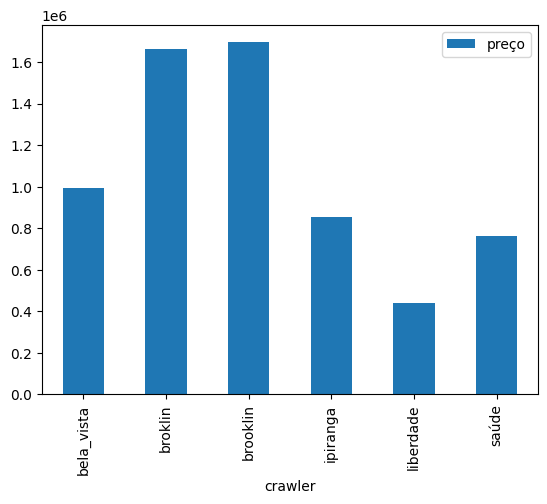

In [8]:
df.groupby('crawler').agg({'preço': "mean"}).plot(kind='bar')

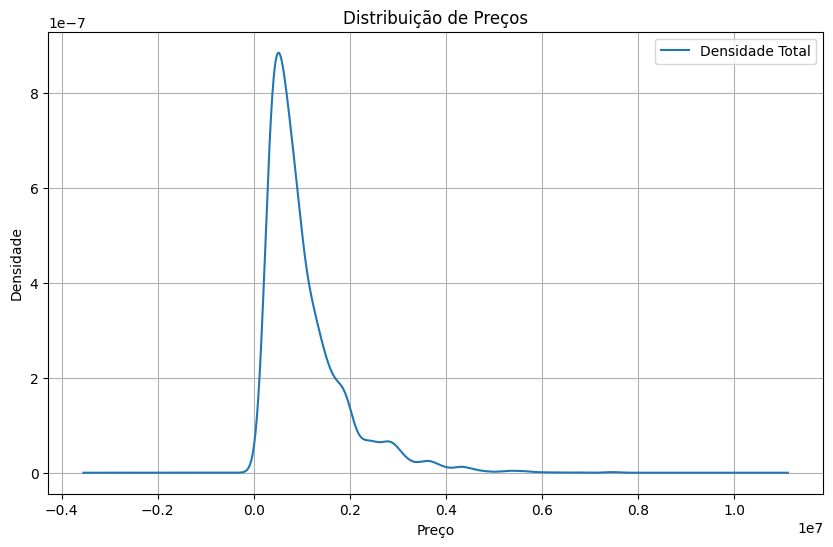

In [9]:
# Plotar gráfico de densidade dos preços
plt.figure(figsize=(10, 6))
df['preço'].plot(kind='kde', label='Densidade Total')
plt.xlabel('Preço')
plt.ylabel('Densidade')
plt.title('Distribuição de Preços')
plt.legend()
plt.grid(True)
plt.show()

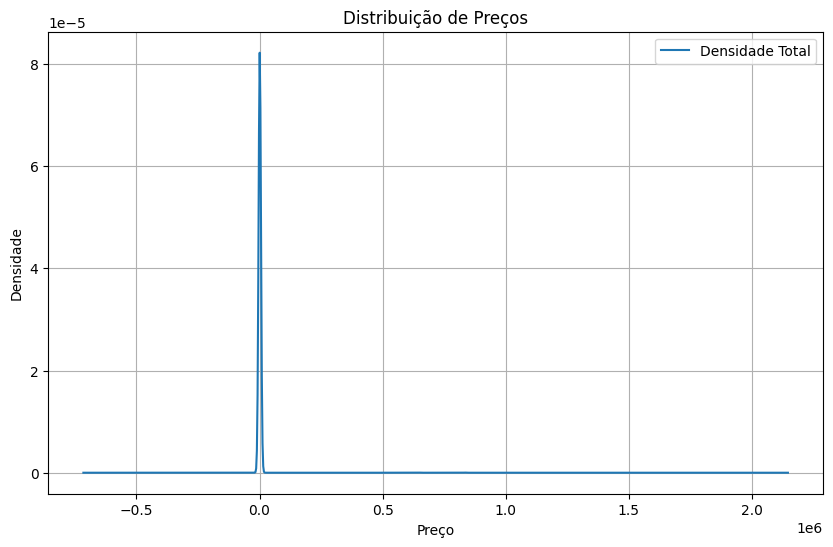

In [10]:
# Plotar gráfico de densidade dos preços
plt.figure(figsize=(10, 6))
df['condominio'].plot(kind='kde', label='Densidade Total')
plt.xlabel('Preço')
plt.ylabel('Densidade')
plt.title('Distribuição de Preços')
plt.legend()
plt.grid(True)
plt.show()

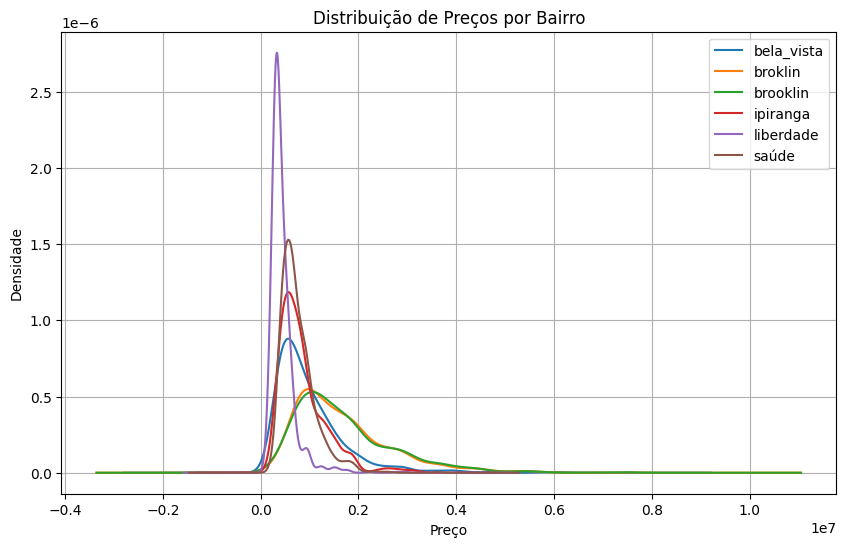

In [11]:
# Plotar gráfico de densidade dos preços por bairro
plt.figure(figsize=(10, 6))
for bairro, dados in df.groupby('crawler')['preço']:
    dados.plot(kind='kde', label=bairro)
plt.xlabel('Preço')
plt.ylabel('Densidade')
plt.title('Distribuição de Preços por Bairro')
plt.legend()
plt.grid(True)
plt.show()


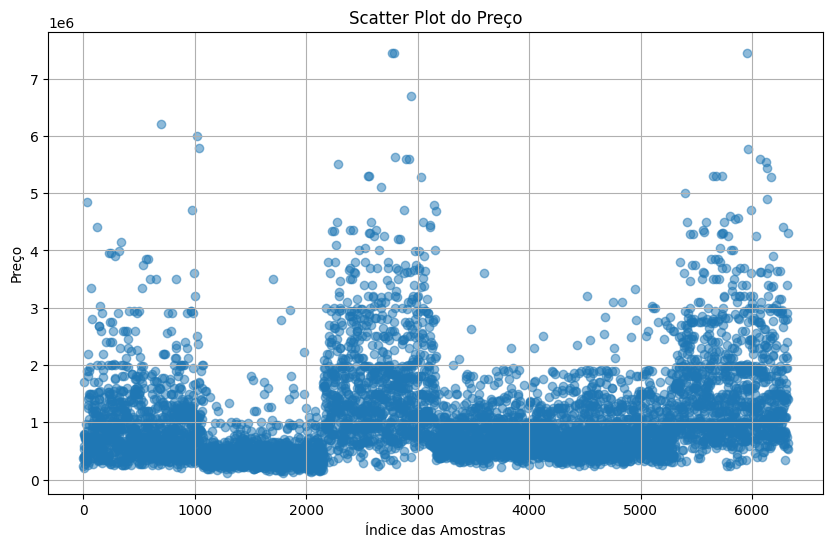

In [12]:
# Plotar scatter plot para relação preço x índice das amostras
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['preço'], alpha=0.5)
plt.xlabel('Índice das Amostras')
plt.ylabel('Preço')
plt.title('Scatter Plot do Preço')
plt.grid(True)
plt.show()

<Axes: >

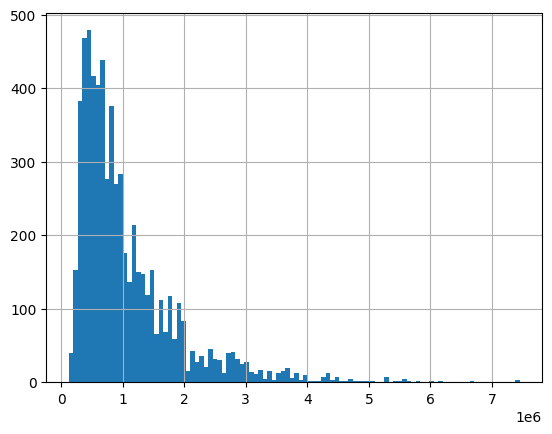

In [13]:
df['preço'].hist(bins=100)

<Axes: ylabel='preço'>

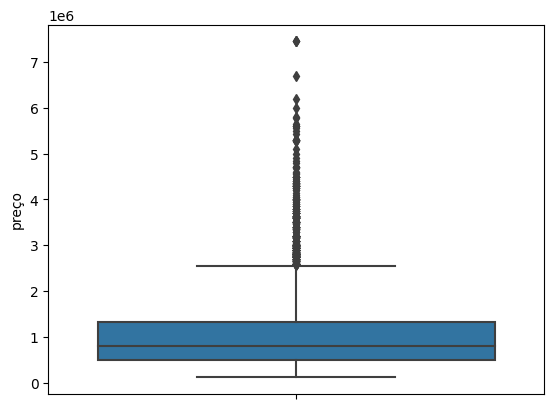

In [14]:
sns.boxplot(data = df, y = "preço")

<Axes: ylabel='condominio'>

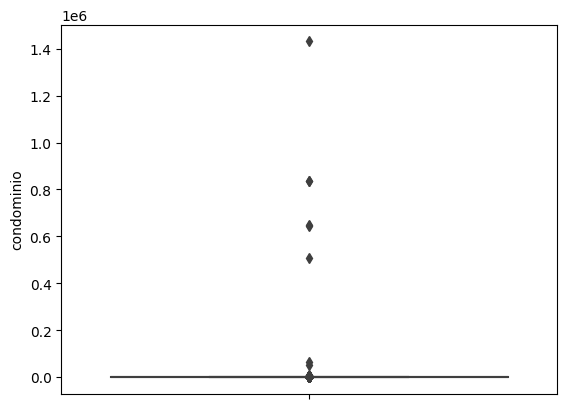

In [15]:
sns.boxplot(data = df, y = "condominio")

<Axes: xlabel='preço', ylabel='crawler'>

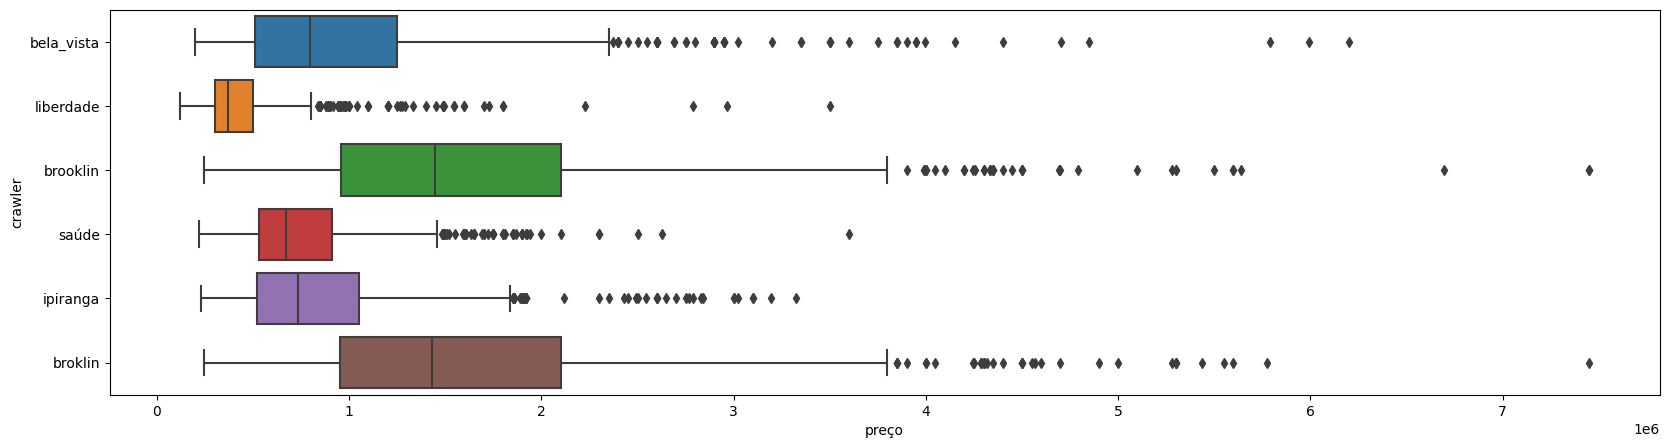

In [16]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df, y = "crawler", x = 'preço')

<Axes: xlabel='condominio', ylabel='crawler'>

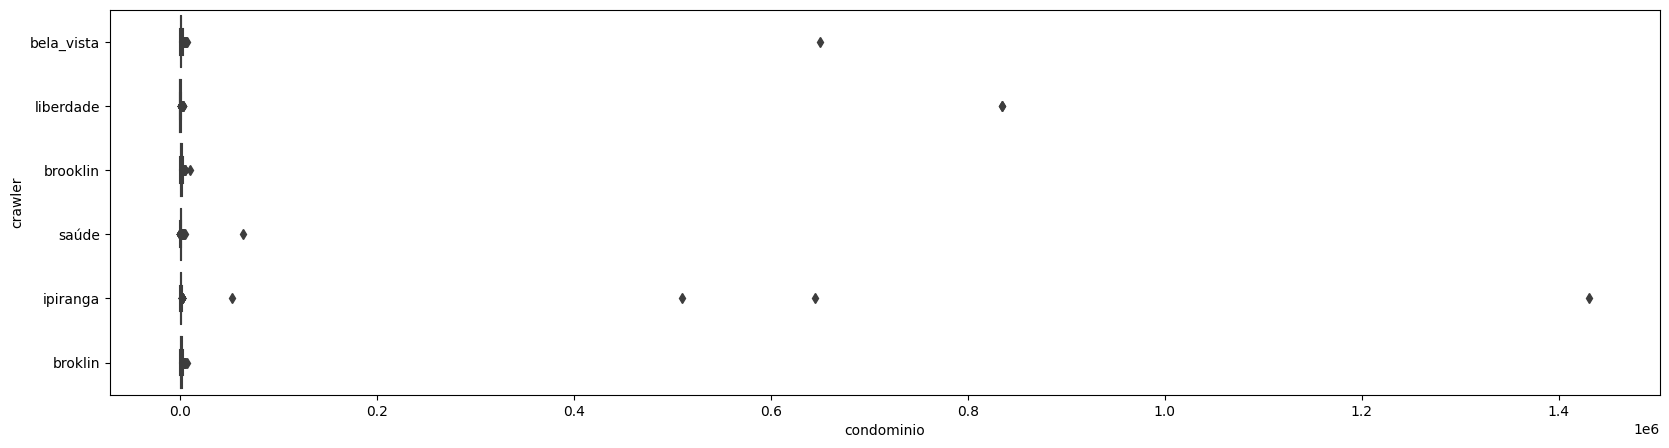

In [17]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df, y = "crawler", x = 'condominio')

<Axes: xlabel='preço', ylabel='area_limpo'>

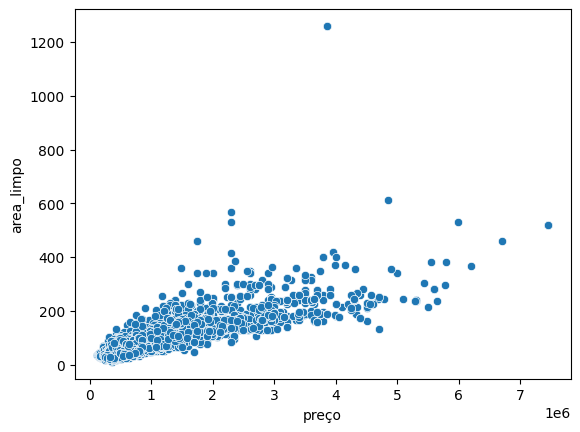

In [18]:
sns.scatterplot(data = df, y = "area_limpo", x = 'preço')

<Axes: xlabel='preço', ylabel='crawler'>

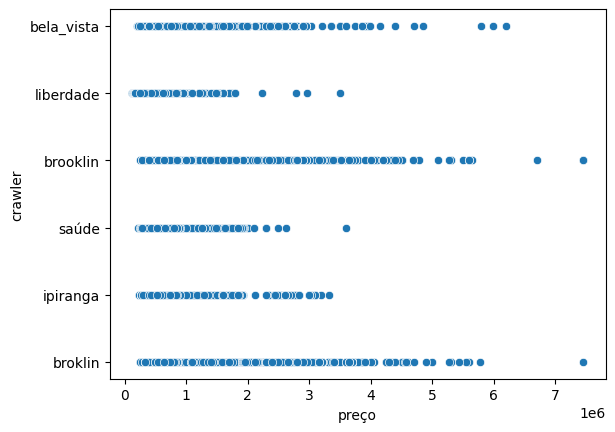

In [19]:
sns.scatterplot(data = df, y = "crawler", x = 'preço')

<Axes: xlabel='preço', ylabel='Quarto'>

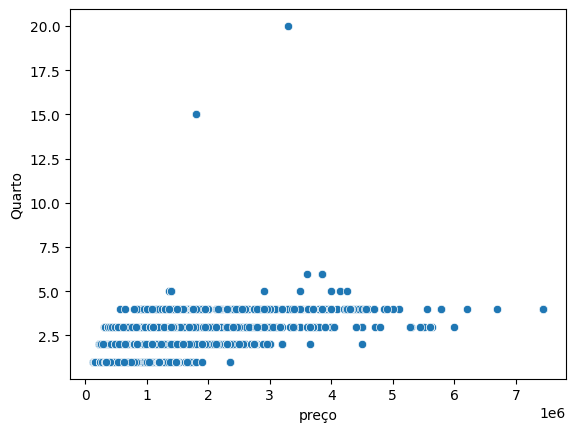

In [20]:
sns.scatterplot(data = df, y = "Quarto", x = 'preço')

<Axes: xlabel='preço', ylabel='condominio'>

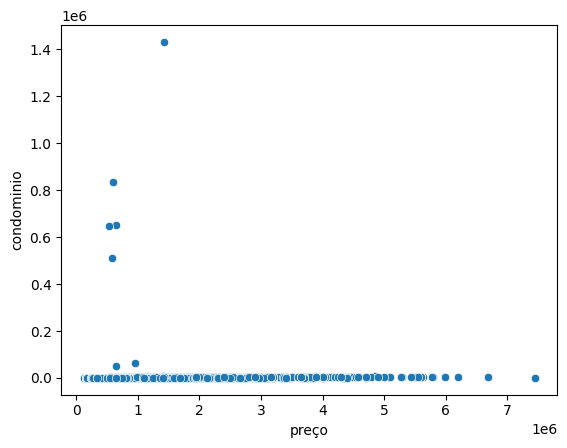

In [21]:
sns.scatterplot(data = df, y = "condominio", x = 'preço')

In [22]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'url', 'header',
       'address', 'amenities', 'crawler', 'crawled_at', 'Quarto', 'Banheiro',
       'Garagem', 'condominio', 'preço', 'area_limpo', 'Churrasqueira',
       'Escritório', 'Perto de hospitais', 'Área de lazer',
       'Quadra poliesportiva', 'Quintal', 'Espaço gourmet', 'Sala de massagem',
       'TV a cabo', 'Próximo a shopping', 'Sistema de alarme',
       'Perto de shopping', 'Janela grande', 'Quadra de tênis', 'Varanda',
       'Depósito', 'Salão de festas', 'Acesso para deficientes', 'Jardim',
       'Condomínio fechado', 'Área de serviço', 'Zelador', 'Armário embutido',
       'Box blindex', 'Academia', 'Varanda gourmet', 'Aquecimento',
       'Perto de vias de acesso', 'Guarita blindada', 'Mais de um andar',
       'Copa', 'Salão de jogos', 'Vista exterior', 'Vista para o mar',
       'Elevador', 'Segurança 24h', 'Cozinha gourmet', 'Piscina infantil',
       'Perto de escolas', 'Porcelanato', 'Espaço verd

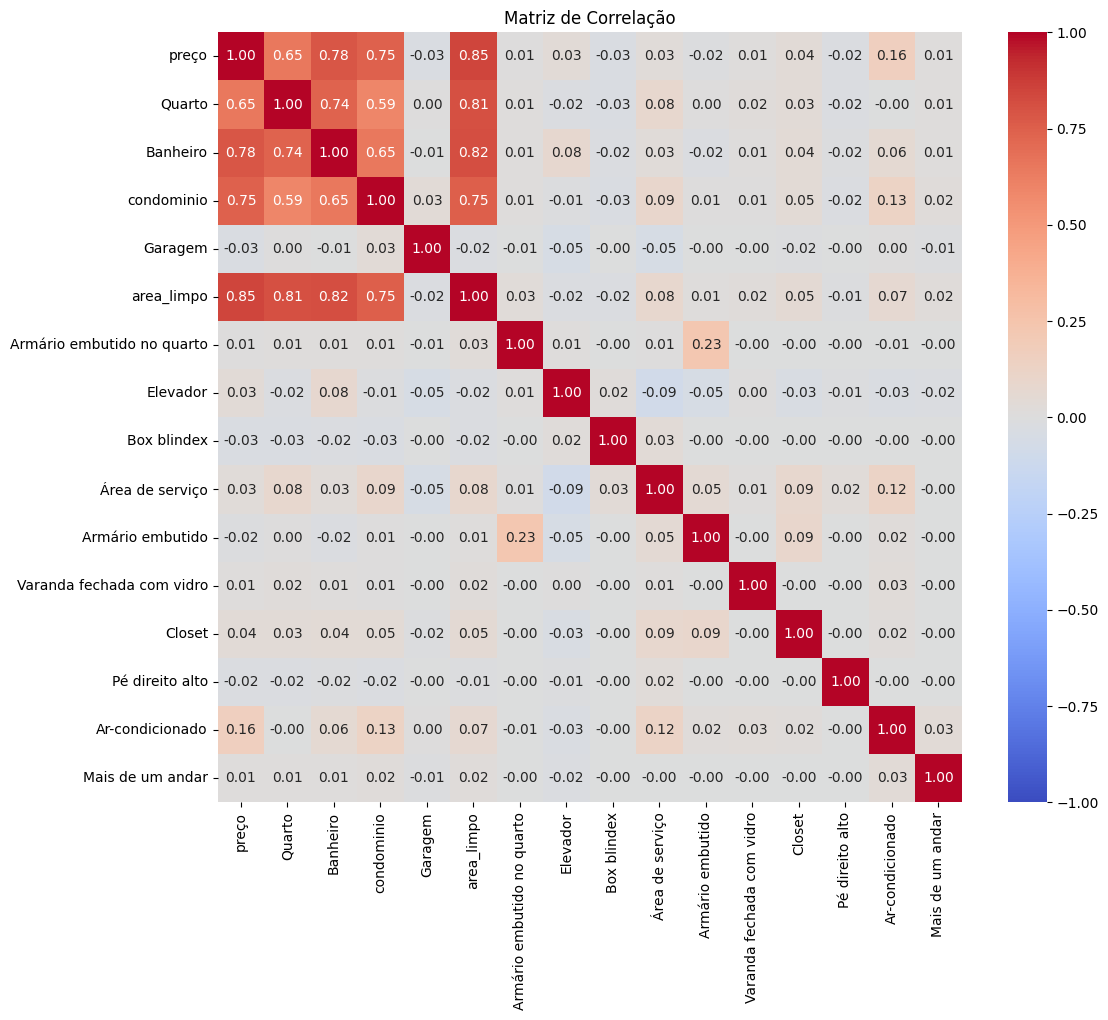

In [23]:
correlation_matrix = df[['preço','Quarto', 'Banheiro','condominio','Garagem', 'area_limpo',
    'Armário embutido no quarto','Elevador','Box blindex','Área de serviço',
    'Armário embutido','Varanda fechada com vidro','Closet',
    'Pé direito alto', 'Ar-condicionado','Mais de um andar',]].corr(method='spearman')
# Plotando o gráfico de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlação')
plt.show()